In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#getting the data
df=pd.read_csv("/content/ADANIPORTS.csv")

In [5]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [ ]:
df.info()

In [6]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [8]:
df.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


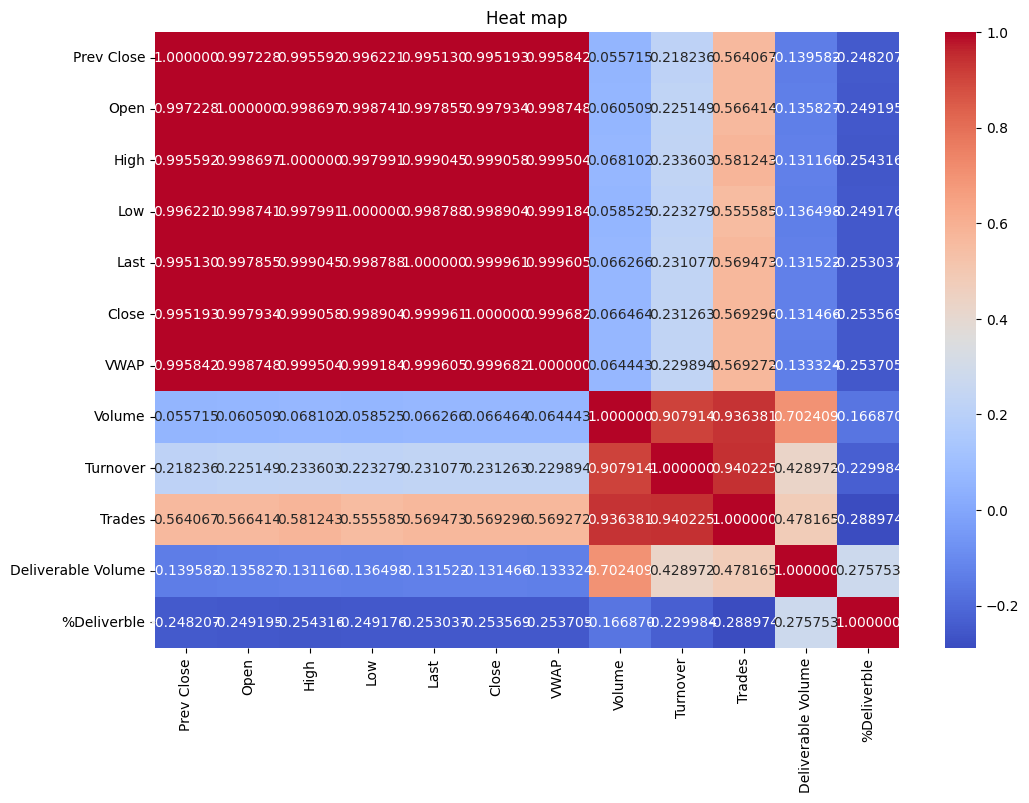

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt="2f")
plt.title("Heat map")
plt.show()

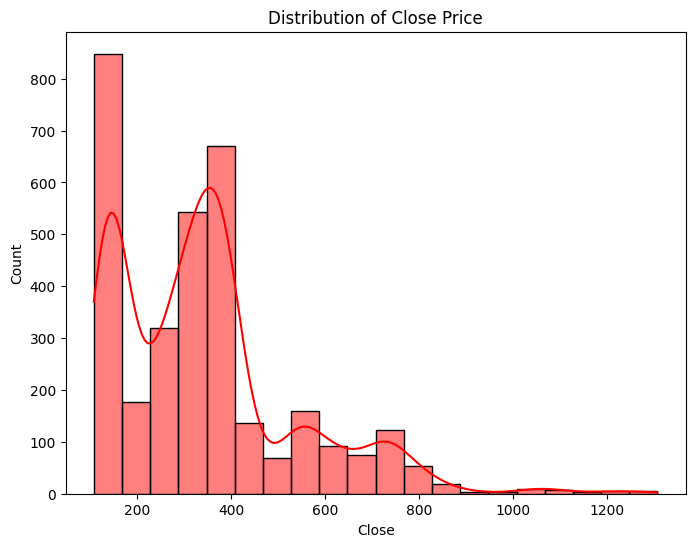

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(df['Close'],bins=20,kde=True,color="red")
plt.title("Distribution of Close Price")
plt.show()

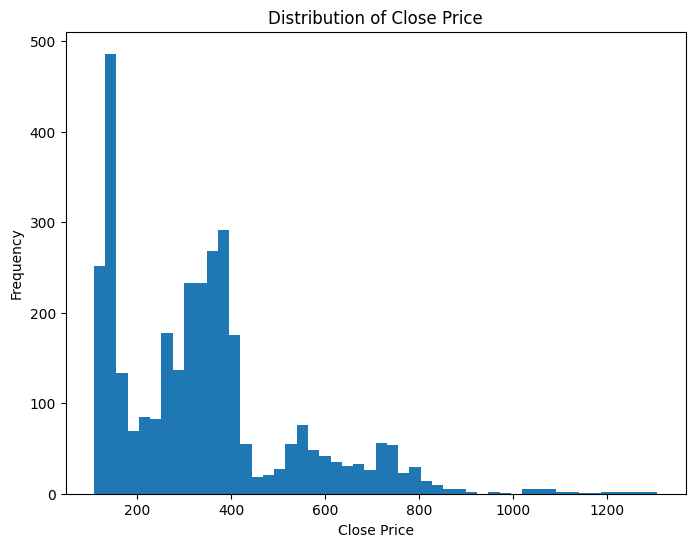

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df['Close'],bins=50)
plt.title("Distribution of Close Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

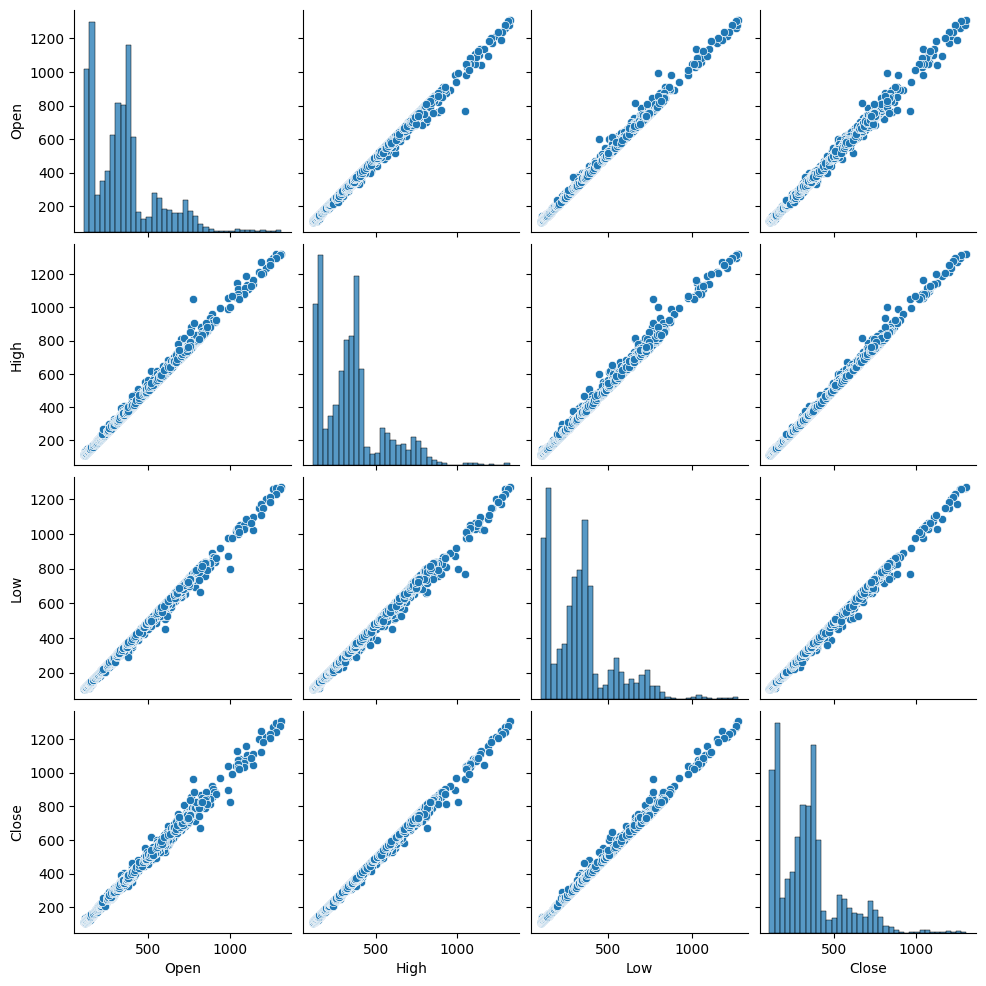

In [15]:
numeric_feature=['Open','High','Low','Close']
sns.pairplot(df[numeric_feature])
plt.show()

In [17]:
features=['Open','High','Low']
x=df[features]
y=df['Close']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [19]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
print("intercept:",model.intercept_)
print("coefficients:",model.coef_)

intercept: 0.9751183465888857
coefficients: [-0.49306199  0.77870666  0.70949184]


In [21]:
y_pred=model.predict(X_test)
y


,Close
0,962.90
1,893.90
2,884.20
3,921.55
4,969.30
...,...
3317,730.75
3318,749.15
3319,746.25
3320,746.75


In [22]:
mse=mean_squared_error(y_test,y_pred)
mse


18.805768787186103

In [23]:
#normalizing the mse
r2=r2_score(y_test,y_pred)
r2

0.9995212308091914